In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from collections import defaultdict


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# helper: normalize column names (lowercase, underscores)
def normalize_cols(df):
    df = df.copy()
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

## Load files (you already have them) + normalize

In [ ]:
# Load each dataset separately
df_info = pd.read_csv(r"/content/drive/MyDrive/Project /Intrenship/DataSets/movie/movie_info.csv")
df_ratings = pd.read_csv(r"/content/drive/MyDrive/Project /Intrenship/DataSets/movie/movie_ratings.csv")
df_users = pd.read_csv(r"/content/drive/MyDrive/Project /Intrenship/DataSets/movie/movie_user_demographics.csv")



df_info = normalize_cols(df_info)
df_ratings = normalize_cols(df_ratings)
df_users = normalize_cols(df_users)

In [ ]:

# quick check
print("info:", df_info.shape)
print("ratings:", df_ratings.shape)
print("users:", df_users.shape)
df_info.head(2), df_ratings.head(2), df_users.head(2)

info: (1682, 22)
ratings: (100000, 4)
users: (943, 5)


(   movie_id       movie_title release_date  unknown  action  adventure  \
 0         1  Toy Story (1995)    01-Jan-95        0       0          0   
 1         2  GoldenEye (1995)    01-Jan-95        0       1          1   
 
    animation  children's  comedy  crime  ...  fantasy  film-noir  horror  \
 0          1           1       1      0  ...        0          0       0   
 1          0           0       0      0  ...        0          0       0   
 
    musical  mystery  romance  sci-fi  thriller  war  western  
 0        0        0        0       0         0    0        0  
 1        0        0        0       0         1    0        0  
 
 [2 rows x 22 columns],
    user_id  movie_id  rating  unix_timestamp
 0      196       242       3       881250949
 1      186       302       3       891717742,
    user_id  age sex  occupation zip_code
 0        1   24   M  technician    85711
 1        2   53   F       other    94043)

In [ ]:
print("Info columns:", df_info.columns.tolist())
print("Ratings columns:", df_ratings.columns.tolist())
print("Users columns:", df_users.columns.tolist())

Info columns: ['movie_id', 'movie_title', 'release_date', 'unknown', 'action', 'adventure', 'animation', "children's", 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']
Ratings columns: ['user_id', 'movie_id', 'rating', 'unix_timestamp']
Users columns: ['user_id', 'age', 'sex', 'occupation', 'zip_code']


## Ratings Distribution

/tmp/ipython-input-1333284296.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=df_ratings, palette="viridis")


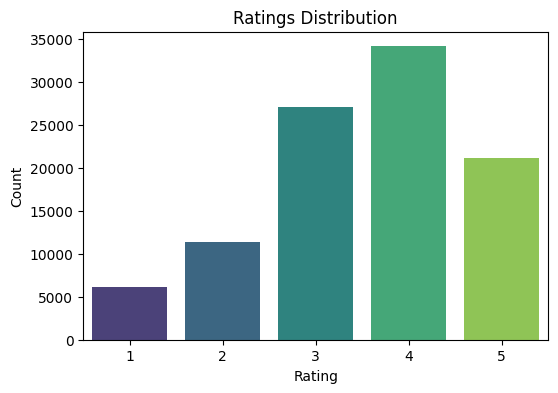

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ratings distribution
plt.figure(figsize=(6,4))
sns.countplot(x="rating", data=df_ratings, palette="viridis")
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


## Top 10 Most Rated Movies

/tmp/ipython-input-313348297.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies.values, y=top_movies.index, palette="magma")


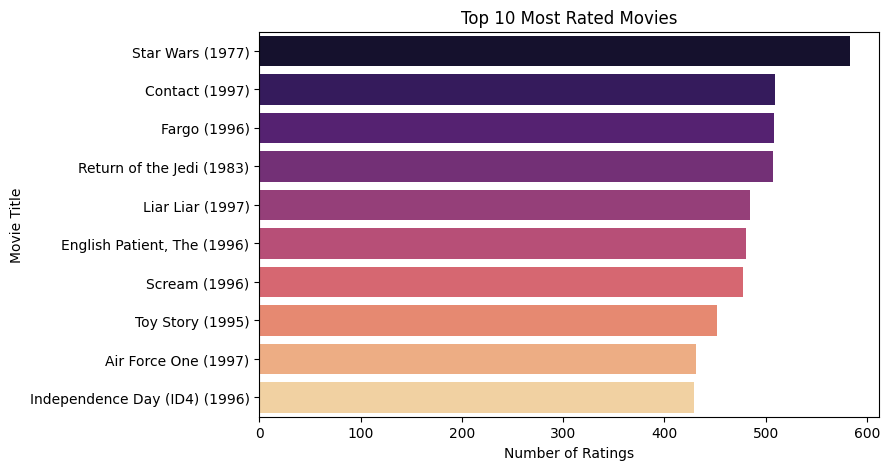

In [ ]:
# Merge ratings with movie info
df = df_ratings.merge(df_info, on="movie_id")

top_movies = df.groupby("movie_title")["rating"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_movies.values, y=top_movies.index, palette="magma")
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.show()

## Average Rating per Genre

/tmp/ipython-input-2984715075.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_genre_ratings.values, y=avg_genre_ratings.index, palette="coolwarm")


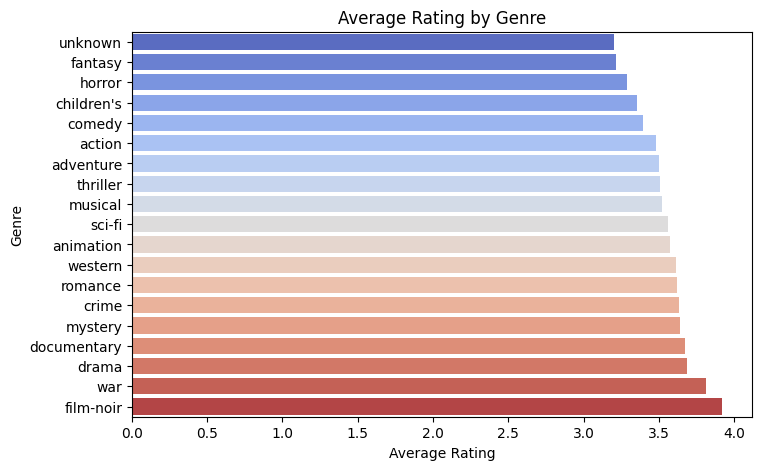

In [ ]:
# Melt genres into single column
genre_cols = df_info.columns[3:]
df_genres = df_info.melt(id_vars=["movie_id", "movie_title"], value_vars=genre_cols,
                         var_name="genre", value_name="is_genre")

# Filter only where genre = 1
df_genres = df_genres[df_genres["is_genre"] == 1]

# Merge with ratings
df_genres_ratings = df_ratings.merge(df_genres, on="movie_id")

avg_genre_ratings = df_genres_ratings.groupby("genre")["rating"].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_genre_ratings.values, y=avg_genre_ratings.index, palette="coolwarm")
plt.title("Average Rating by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

## User Age Distribution

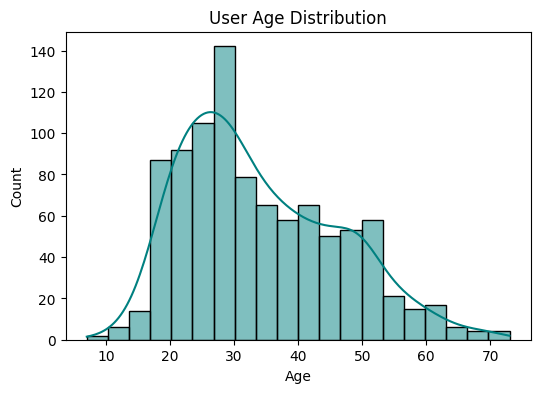

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df_users["age"], bins=20, kde=True, color="teal")
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## Average Rating by Gender

/tmp/ipython-input-2932066314.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_gender_rating.index, y=avg_gender_rating.values, palette="Set2")


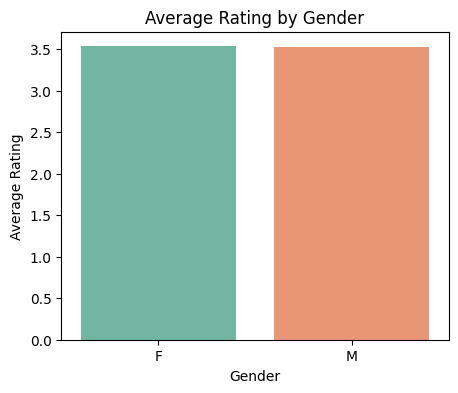

In [ ]:
df_user_ratings = df_ratings.merge(df_users, on="user_id")
avg_gender_rating = df_user_ratings.groupby("sex")["rating"].mean()

plt.figure(figsize=(5,4))
sns.barplot(x=avg_gender_rating.index, y=avg_gender_rating.values, palette="Set2")
plt.title("Average Rating by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Rating")
plt.show()

##

## Clean nulls sensibly

In [ ]:
# Clean df_info
df_info = df_info.dropna(subset=["movie_id", "movie_title"]).fillna("Unknown")

# Clean df_ratings
df_ratings = df_ratings.dropna(subset=["user_id", "movie_id", "rating"])

# Clean df_users
df_users = df_users.dropna(subset=["user_id"]).fillna("Unknown")


In [ ]:
print("Info columns:", df_info.columns.tolist())
print("Ratings columns:", df_ratings.columns.tolist())


Info columns: ['movie_id', 'movie_title', 'release_date', 'unknown', 'action', 'adventure', 'animation', "children's", 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']
Ratings columns: ['user_id', 'movie_id', 'rating', 'unix_timestamp']


## Merge into a single dataframe (optional but convenient)

In [ ]:
# Standardize column names
df_users = df_users.rename(columns={"userId": "user_id", "UserID": "user_id"})

# Merge again
df = pd.merge(df_ratings, df_info, on="movie_id", how="inner")
df = pd.merge(df, df_users, on="user_id", how="inner")

print("Final dataset shape:", df.shape)
df.head()


Final dataset shape: (100000, 29)


,user_id,movie_id,rating,unix_timestamp,movie_title,release_date,unknown,action,adventure,animation,...,mystery,romance,sci-fi,thriller,war,western,age,sex,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),24-Jan-97,0,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-97,0,0,0,0,...,1,0,0,1,0,0,39,F,executive,00000
2,22,377,1,878887116,Heavyweights (1994),01-Jan-94,0,0,0,0,...,0,0,0,0,0,0,25,M,writer,40206
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-94,0,0,0,0,...,0,1,0,0,1,1,28,M,technician,80525
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-97,0,0,0,0,...,0,0,0,0,0,0,47,M,educator,55113


## Build user↔item index mappings and sparse matrix

In [ ]:
# Build index maps
user_ids = np.sort(df["user_id"].unique())
item_ids = np.sort(df["movie_id"].unique())

uid_to_idx = {u:i for i,u in enumerate(user_ids)}
idx_to_uid = {i:u for u,i in uid_to_idx.items()}
iid_to_idx = {m:i for i,m in enumerate(item_ids)}
idx_to_iid = {i:m for m,i in iid_to_idx.items()}

# Indices
rows = df["user_id"].map(uid_to_idx).values
cols = df["movie_id"].map(iid_to_idx).values
data = df["rating"].values.astype(np.float32)

# Build sparse matrix
from scipy.sparse import csr_matrix
n_users = len(user_ids)
n_items = len(item_ids)
R = csr_matrix((data, (rows, cols)), shape=(n_users, n_items), dtype=np.float32)

print("R shape:", R.shape, "nonzeros:", R.nnz)


R shape: (943, 1682) nonzeros: 100000


## User Activity (Number of Ratings per User)

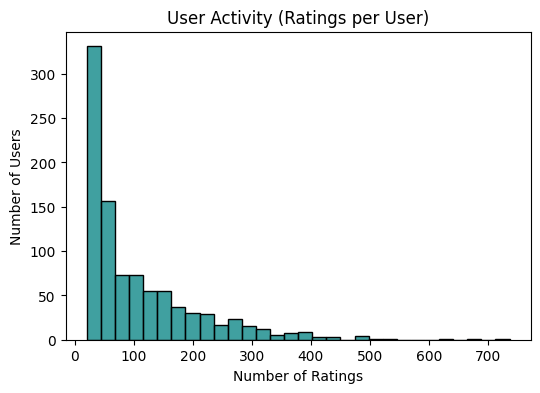

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

user_activity = np.diff(R.indptr)  # number of ratings per user
plt.figure(figsize=(6,4))
sns.histplot(user_activity, bins=30, kde=False, color="teal")
plt.title("User Activity (Ratings per User)")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

## Item Popularity (Number of Ratings per Movie)

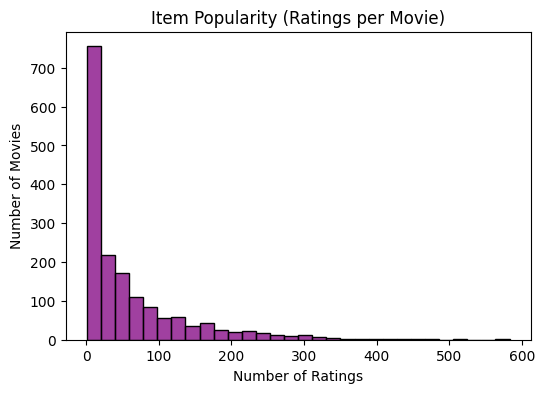

In [ ]:
item_popularity = np.diff(R.tocsc().indptr)  # number of ratings per item
plt.figure(figsize=(6,4))
sns.histplot(item_popularity, bins=30, kde=False, color="purple")
plt.title("Item Popularity (Ratings per Movie)")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.show()

## parsity of R Matrix (Heatmap View for Small Subset)

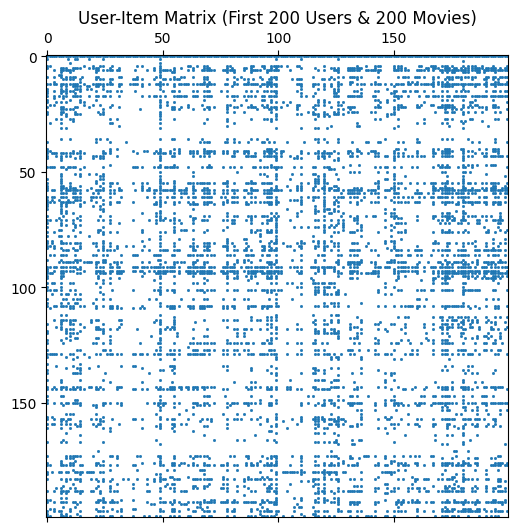

In [ ]:
plt.figure(figsize=(6,6))
plt.spy(R[:200, :200], markersize=1)
plt.title("User-Item Matrix (First 200 Users & 200 Movies)")
plt.show()

## Average Rating per User

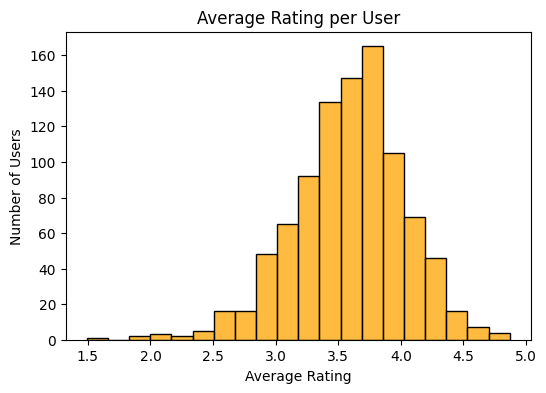

In [ ]:
avg_user_rating = R.sum(axis=1).A1 / (user_activity + 1e-9)

plt.figure(figsize=(6,4))
sns.histplot(avg_user_rating, bins=20, color="orange")
plt.title("Average Rating per User")
plt.xlabel("Average Rating")
plt.ylabel("Number of Users")
plt.show()

## Average Rating per Movie

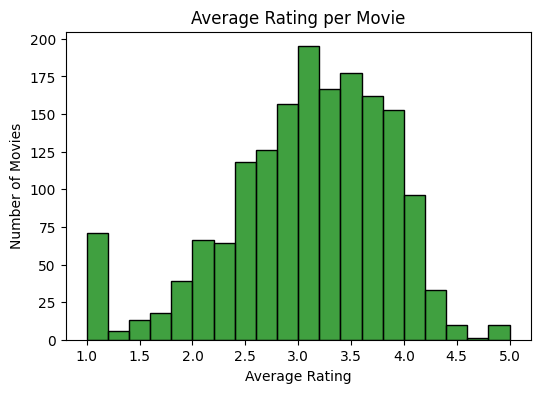

In [ ]:
avg_item_rating = R.sum(axis=0).A1 / (item_popularity + 1e-9)

plt.figure(figsize=(6,4))
sns.histplot(avg_item_rating, bins=20, color="green")
plt.title("Average Rating per Movie")
plt.xlabel("Average Rating")
plt.ylabel("Number of Movies")
plt.show()

## Train/test split — per-user holdout (recommended)

In [ ]:
# Assume df is your MovieLens dataframe with user_id, movie_id, rating
# Per-user holdout split
def per_user_holdout_split(df, test_ratio=0.2, seed=42):
    np.random.seed(seed)
    train_list = []
    test_list = []

    for user, group in df.groupby("user_id"):
        n_items = len(group)
        if n_items == 1:
            # If only 1 rating, put it in train (can't split)
            train_list.append(group)
            continue

        # How many items to hold out for this user
        n_test = max(1, int(test_ratio * n_items))

        # Randomly sample test indices
        test_idx = np.random.choice(group.index, size=n_test, replace=False)
        test_list.append(group.loc[test_idx])
        train_list.append(group.drop(test_idx))

    train_df = pd.concat(train_list).reset_index(drop=True)
    test_df = pd.concat(test_list).reset_index(drop=True)

    return train_df, test_df

# Example usage
train_df, test_df = per_user_holdout_split(df, test_ratio=0.2)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Check unique users present in both
print("Users in train:", train_df["user_id"].nunique())
print("Users in test:", test_df["user_id"].nunique())


Train shape: (80367, 29)
Test shape: (19633, 29)
Users in train: 943
Users in test: 943


## Train vs Test Size

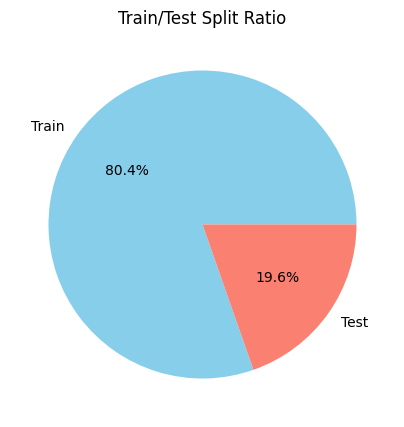

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sizes = [len(train_df), len(test_df)]
labels = ["Train", "Test"]

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=["skyblue", "salmon"])
plt.title("Train/Test Split Ratio")
plt.show()

## Ratings Distribution (Train vs Test)

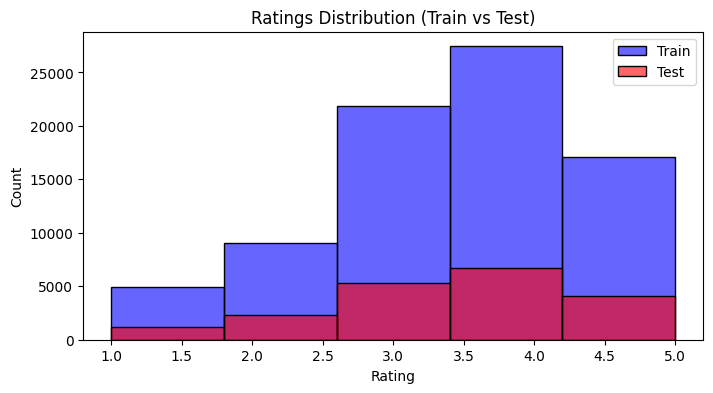

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(train_df["rating"], bins=5, color="blue", label="Train", alpha=0.6)
sns.histplot(test_df["rating"], bins=5, color="red", label="Test", alpha=0.6)
plt.title("Ratings Distribution (Train vs Test)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend()
plt.show()

## Number of Ratings per User (Train vs Test)

/tmp/ipython-input-896534664.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_counts, label="Train", shade=True, color="blue")
/tmp/ipython-input-896534664.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_counts, label="Test", shade=True, color="red")


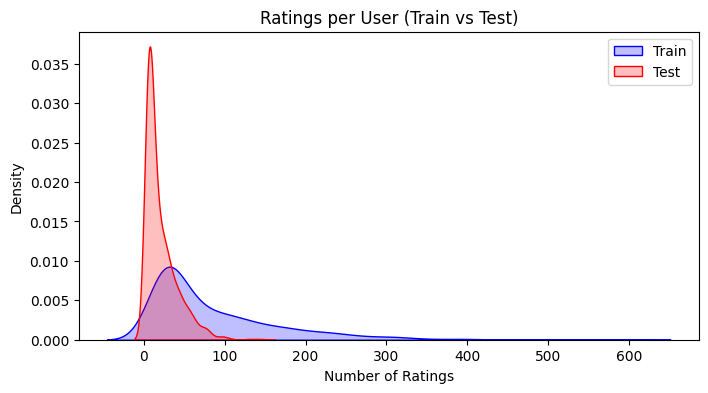

In [ ]:
train_counts = train_df.groupby("user_id")["movie_id"].count()
test_counts = test_df.groupby("user_id")["movie_id"].count()

plt.figure(figsize=(8,4))
sns.kdeplot(train_counts, label="Train", shade=True, color="blue")
sns.kdeplot(test_counts, label="Test", shade=True, color="red")
plt.title("Ratings per User (Train vs Test)")
plt.xlabel("Number of Ratings")
plt.ylabel("Density")
plt.legend()
plt.show()

## Average Rating per User (Train vs Test)

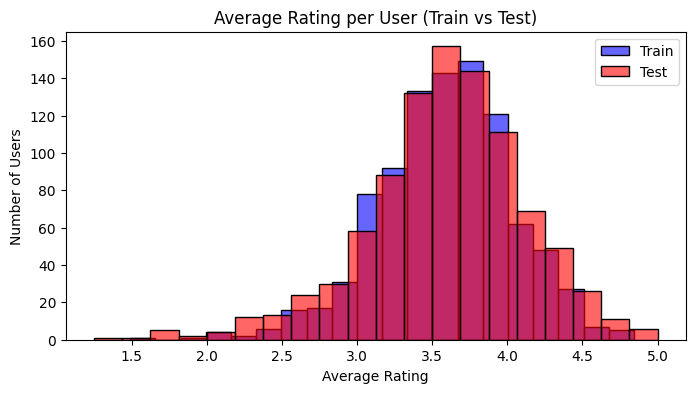

In [ ]:
train_avg = train_df.groupby("user_id")["rating"].mean()
test_avg = test_df.groupby("user_id")["rating"].mean()

plt.figure(figsize=(8,4))
sns.histplot(train_avg, bins=20, color="blue", alpha=0.6, label="Train")
sns.histplot(test_avg, bins=20, color="red", alpha=0.6, label="Test")
plt.title("Average Rating per User (Train vs Test)")
plt.xlabel("Average Rating")
plt.ylabel("Number of Users")
plt.legend()
plt.show()

Rebuild index & R from train_df (so unseen test items are truly unseen):

In [ ]:
# Step 1: Rebuild user_id and movie_id index mappings from train only
unique_users = train_df["user_id"].unique()
unique_items = train_df["movie_id"].unique()

user_to_idx = {u: i for i, u in enumerate(unique_users)}
idx_to_user = {i: u for u, i in user_to_idx.items()}

item_to_idx = {m: i for i, m in enumerate(unique_items)}
idx_to_item = {i: m for m, i in item_to_idx.items()}

print("Users in train:", len(user_to_idx))
print("Movies in train:", len(item_to_idx))

# Step 2: Build train sparse matrix R_train
rows = train_df["user_id"].map(user_to_idx)
cols = train_df["movie_id"].map(item_to_idx)
data = train_df["rating"]

R_train = csr_matrix((data, (rows, cols)), shape=(len(user_to_idx), len(item_to_idx)))

print("R_train shape:", R_train.shape)

# Step 3: Filter test set to only include users/items seen in train
test_df_filtered = test_df[
    test_df["user_id"].isin(user_to_idx) & test_df["movie_id"].isin(item_to_idx)
].copy()

print("Original test size:", len(test_df))
print("Filtered test size:", len(test_df_filtered))

Users in train: 943
Movies in train: 1651
R_train shape: (943, 1651)
Original test size: 19633
Filtered test size: 19599


## User-based collaborative filtering (mean-centered + cosine)

In [ ]:
def user_means(R):
    sums = np.array(R.sum(axis=1)).ravel()
    counts = np.diff(R.indptr)
    means = np.divide(sums.astype(np.float64), counts.astype(np.float64), out=np.zeros_like(sums, dtype=np.float64), where=counts!=0)
    return means

def predict_user_cf(R, neighbors=50, shrinkage=10.0):
    R = R.tocsr()
    means = user_means(R)
    # mean-center
    R_centered = R.copy().tolil()
    for u in range(R_centered.shape[0]):
        if len(R_centered.data[u])>0:
            R_centered.data[u] = [v - means[u] for v in R_centered.data[u]]
    R_centered = R_centered.tocsr()

    sim = cosine_similarity(R_centered, dense_output=True)  # for ML-100k this is fine
    np.fill_diagonal(sim, 0.0)
    # keep top-k neighbors for each user
    if neighbors is not None and neighbors>0:
        for i in range(sim.shape[0]):
            row = sim[i].copy()
            thresh = np.partition(row, -neighbors)[-neighbors] if neighbors < row.size else np.min(row)
            row[row < thresh] = 0.0
            sim[i] = row
    numer = sim.dot(R_centered.toarray())           # shape: users x items
    denom = np.abs(sim).sum(axis=1) + shrinkage     # per user
    P = numer / denom[:, None]
    P = P + means[:, None]
    return P  # dense numpy array=

## Item-based CF (analogous)

In [ ]:
def predict_item_cf(R, neighbors=50, shrinkage=10.0):
    # compute item means and center by item
    R_csc = R.tocsc(copy=True)
    sums = np.array(R.sum(axis=0)).ravel()
    counts = np.diff(R_csc.indptr)
    item_means = np.divide(sums, counts, out=np.zeros_like(sums), where=counts!=0)
    # mean-center per column
    R_centered = R_csc.tolil()
    for j in range(R_centered.shape[1]):
        if len(R_centered.data[j])>0:
            R_centered.data[j] = [v - item_means[j] for v in R_centered.data[j]]
    R_centered = R_centered.tocsc()

    sim_items = cosine_similarity(R_centered.T, dense_output=True)  # items x items
    np.fill_diagonal(sim_items, 0.0)
    # top-k per item
    if neighbors is not None and neighbors>0:
        for j in range(sim_items.shape[0]):
            col = sim_items[j].copy()
            thresh = np.partition(col, -neighbors)[-neighbors] if neighbors < col.size else np.min(col)
            col[col < thresh] = 0.0
            sim_items[j] = col

    numer = R.dot(sim_items)   # users x items
    denom = np.abs(sim_items).sum(axis=0) + shrinkage
    P = numer / denom[None, :]
    P = P + item_means[None, :]
    return P

## SVD (TruncatedSVD)

In [ ]:
def predict_svd(R, rank=50, random_state=42):
    svd = TruncatedSVD(n_components=rank, random_state=random_state)
    U = svd.fit_transform(R)     # users x rank
    Vt = svd.components_         # rank x items
    P = U.dot(Vt)                # users x items
    return P

## Precision@K evaluation

In [ ]:
def masked_topn(pred_row, seen_idx, N=10):
    scores = pred_row.copy()
    if len(seen_idx)>0:
        scores[seen_idx] = -np.inf
    topn = np.argpartition(-scores, N)[:N]
    topn = topn[np.argsort(-scores[topn])]
    return topn

def precision_at_k(preds, train_df, test_df, uid_to_idx, iid_to_idx, K=10, pos_threshold=4.0):
    # test items per user
    test_by_user = defaultdict(list)
    for _, row in test_df.iterrows():
        u = uid_to_idx.get(row["userId"])
        i = iid_to_idx.get(row["movieId"])
        if u is None or i is None:
            continue
        test_by_user[u].append((i, float(row["rating"])))

    seen_by_user = defaultdict(set)
    for _, row in train_df.iterrows():
        u = uid_to_idx.get(row["userId"])
        i = iid_to_idx.get(row["movieId"])
        if u is not None and i is not None:
            seen_by_user[u].add(i)

    precisions = []
    for u, items in test_by_user.items():
        pos_items = {i for i, r in items if r >= pos_threshold}
        if len(pos_items)==0:
            continue
        rec_idx = masked_topn(preds[u], list(seen_by_user[u]), N=K)
        hits = len(set(rec_idx).intersection(pos_items))
        precisions.append(hits / K)
    return float(np.mean(precisions)) if len(precisions)>0 else 0.0


## Precision@K Curve

## Bar Plot for Precision@K

/tmp/ipython-input-4190622428.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Ks, y=precisions, palette="viridis")


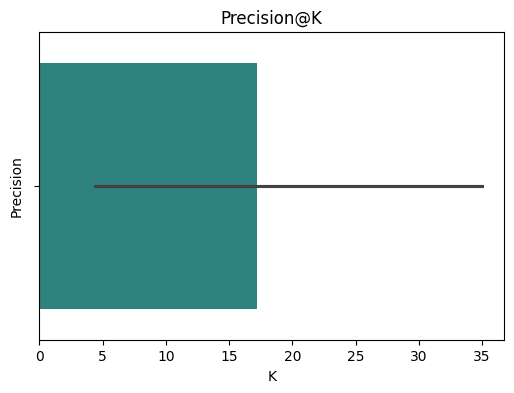

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=Ks, y=precisions, palette="viridis")
plt.title("Precision@K")
plt.xlabel("K")
plt.ylabel("Precision")
plt.show()

## Run experiments & get recommendations for a sample user

#